<a href="https://colab.research.google.com/github/andymohammad/Software-Testing-TD/blob/main/effortEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(os.path.abspath("Software-Effort-Estimation-main/References"))
    sys.path.append(os.path.abspath("Software-Effort-Estimation-main/src"))
    # sys.path.append(module_path+"\\Software-Effort-Estimation-main\\References")
    # sys.path.append(module_path+"\\Software-Effort-Estimation-main\\src")


import data_manipulation as dm
# import data_visualization as dv
# import data_dictionary as dd
# import data_preprocessing as dp


import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

C:\Users\Muhammad Andy\AppData\Local\Temp\ipykernel_33536\889537608.py:20: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
path = 'C:/Users/Muhammad Andy/OneDrive - Institut Teknologi Sepuluh Nopember/OWN PAPER/SOFTWARE TESTING/SOFTWARE TEST COST ESTIMATION/Original Paper/Software Cost Estimation/DATASET/Dataset 3/cleaned_data.xlsx';
df_sierra = pd.read_excel(path,  header=0)
arrHeading = pd.read_excel(path, index_col=0, nrows=0).columns.tolist()
arrHeading.sort()
print(arrHeading)
df_sierra.head()

['Actual duration', 'Actual effort', 'Analysts capability', 'Application domain', 'Clarity of manual system', 'Comments within the code', 'Consultant availability', 'Contract maturity', 'Customer organization type', 'DBMS expert availability', 'DBMS used', 'Daily working hours', 'Dedicated team members', 'Degree of risk management', 'Degree of software reuse', 'Developer hiring policy', 'Developer incentives policy', 'Developer training', 'Development environment adequacy', 'Development team management', 'Development type', 'Economic instability impact', 'Estimated duration', 'Estimated effort', 'Government policy impact', 'Income satisfaction', 'Level of outsourcing', 'Methodology', 'Multiple programing languages', 'Object points', 'Open source software', 'Organization management structure clarity', 'Organization type', 'Other sizing method', 'Performance requirements', 'Precedentedness', 'Process reengineering', 'Product complexity', 'Programmers capability', 'Programmers experience 

Unnamed: 0  Year of project  Organization type  Role in organization  \
0           0             2015                  1                     1   
1           1             2016                  5                     1   
2           2             2008                  5                     3   
3           3             2009                  4                     2   
4           4             2016                  4                     2   

   Size of organization  Size of IT department  Customer organization type  \
0                    16                      7                          13   
1                     2                      1                           2   
2                     2                      2                           3   
3                     3                      2                           4   
4                     3                      2                           4   

   Estimated duration  Actual duration  Development type  Application domain  \
0                 2.0              3.0                 1                   7   
1                 2.0              3.0                 1                   3   
2                 3.0              5.0                 1                   3   
3                 6.0              6.0                 1                   7   
4                12.0             24.0                 1                   7   

   Object points  Other sizing method  Estimated effort  Actual effort  \
0          100.0                    2              2112         3168.0   
1           19.0                    2              1056         1584.0   
2           64.0                    3              3168         5280.0   
3          246.0                    5              5280         5280.0   
4          420.0                    5             19008        38016.0   

   Contract maturity  Government policy impact  Economic instability impact  \
0                  8                       4.0                            1   
1                  4                       4.0                            3   
2                  4                       5.0                            2   
3                  2                       4.0                            1   
4                  3                       4.0                            3   

   Organization management structure clarity  Developer hiring policy  \
0                                        2.0                      1.0   
1                                        1.0                      2.0   
2                                        3.0                      4.0   
3                                        1.0                      1.0   
4                                        1.0                      2.0   

   Developer incentives policy  Developer training  \
0                          8.0                 3.0   
1                          6.0                 3.0   
2                          6.0                 3.0   
3                          4.0                 3.0   
4                          3.0                 3.0   

   Development team management  Top management support  \
0                          4.0                       4   
1                          7.0                       4   
2                          6.0                       1   
3                          6.0                       4   
4                          2.0                       4   

   Top management opinion of previous system  Clarity of manual system  \
0                                          1                       2.0   
1                                          1                       4.0   
2                                          0                       6.0   
3                                          1                       3.0   
4                                          1                       3.0   

   User resistance  User computer experience  Users stability  \
0             1.75                         2         1.8888

In [ ]:
print(arrHeading)

['Actual duration', 'Actual effort', 'Analysts capability', 'Application domain', 'Clarity of manual system', 'Comments within the code', 'Consultant availability', 'Contract maturity', 'Customer organization type', 'DBMS expert availability', 'DBMS used', 'Daily working hours', 'Dedicated team members', 'Degree of risk management', 'Degree of software reuse', 'Developer hiring policy', 'Developer incentives policy', 'Developer training', 'Development environment adequacy', 'Development team management', 'Development type', 'Economic instability impact', 'Estimated duration', 'Estimated effort', 'Government policy impact', 'Income satisfaction', 'Level of outsourcing', 'Methodology', 'Multiple programing languages', 'Object points', 'Open source software', 'Organization management structure clarity', 'Organization type', 'Other sizing method', 'Performance requirements', 'Precedentedness', 'Process reengineering', 'Product complexity', 'Programmers capability', 'Programmers experience 

<Axes: >

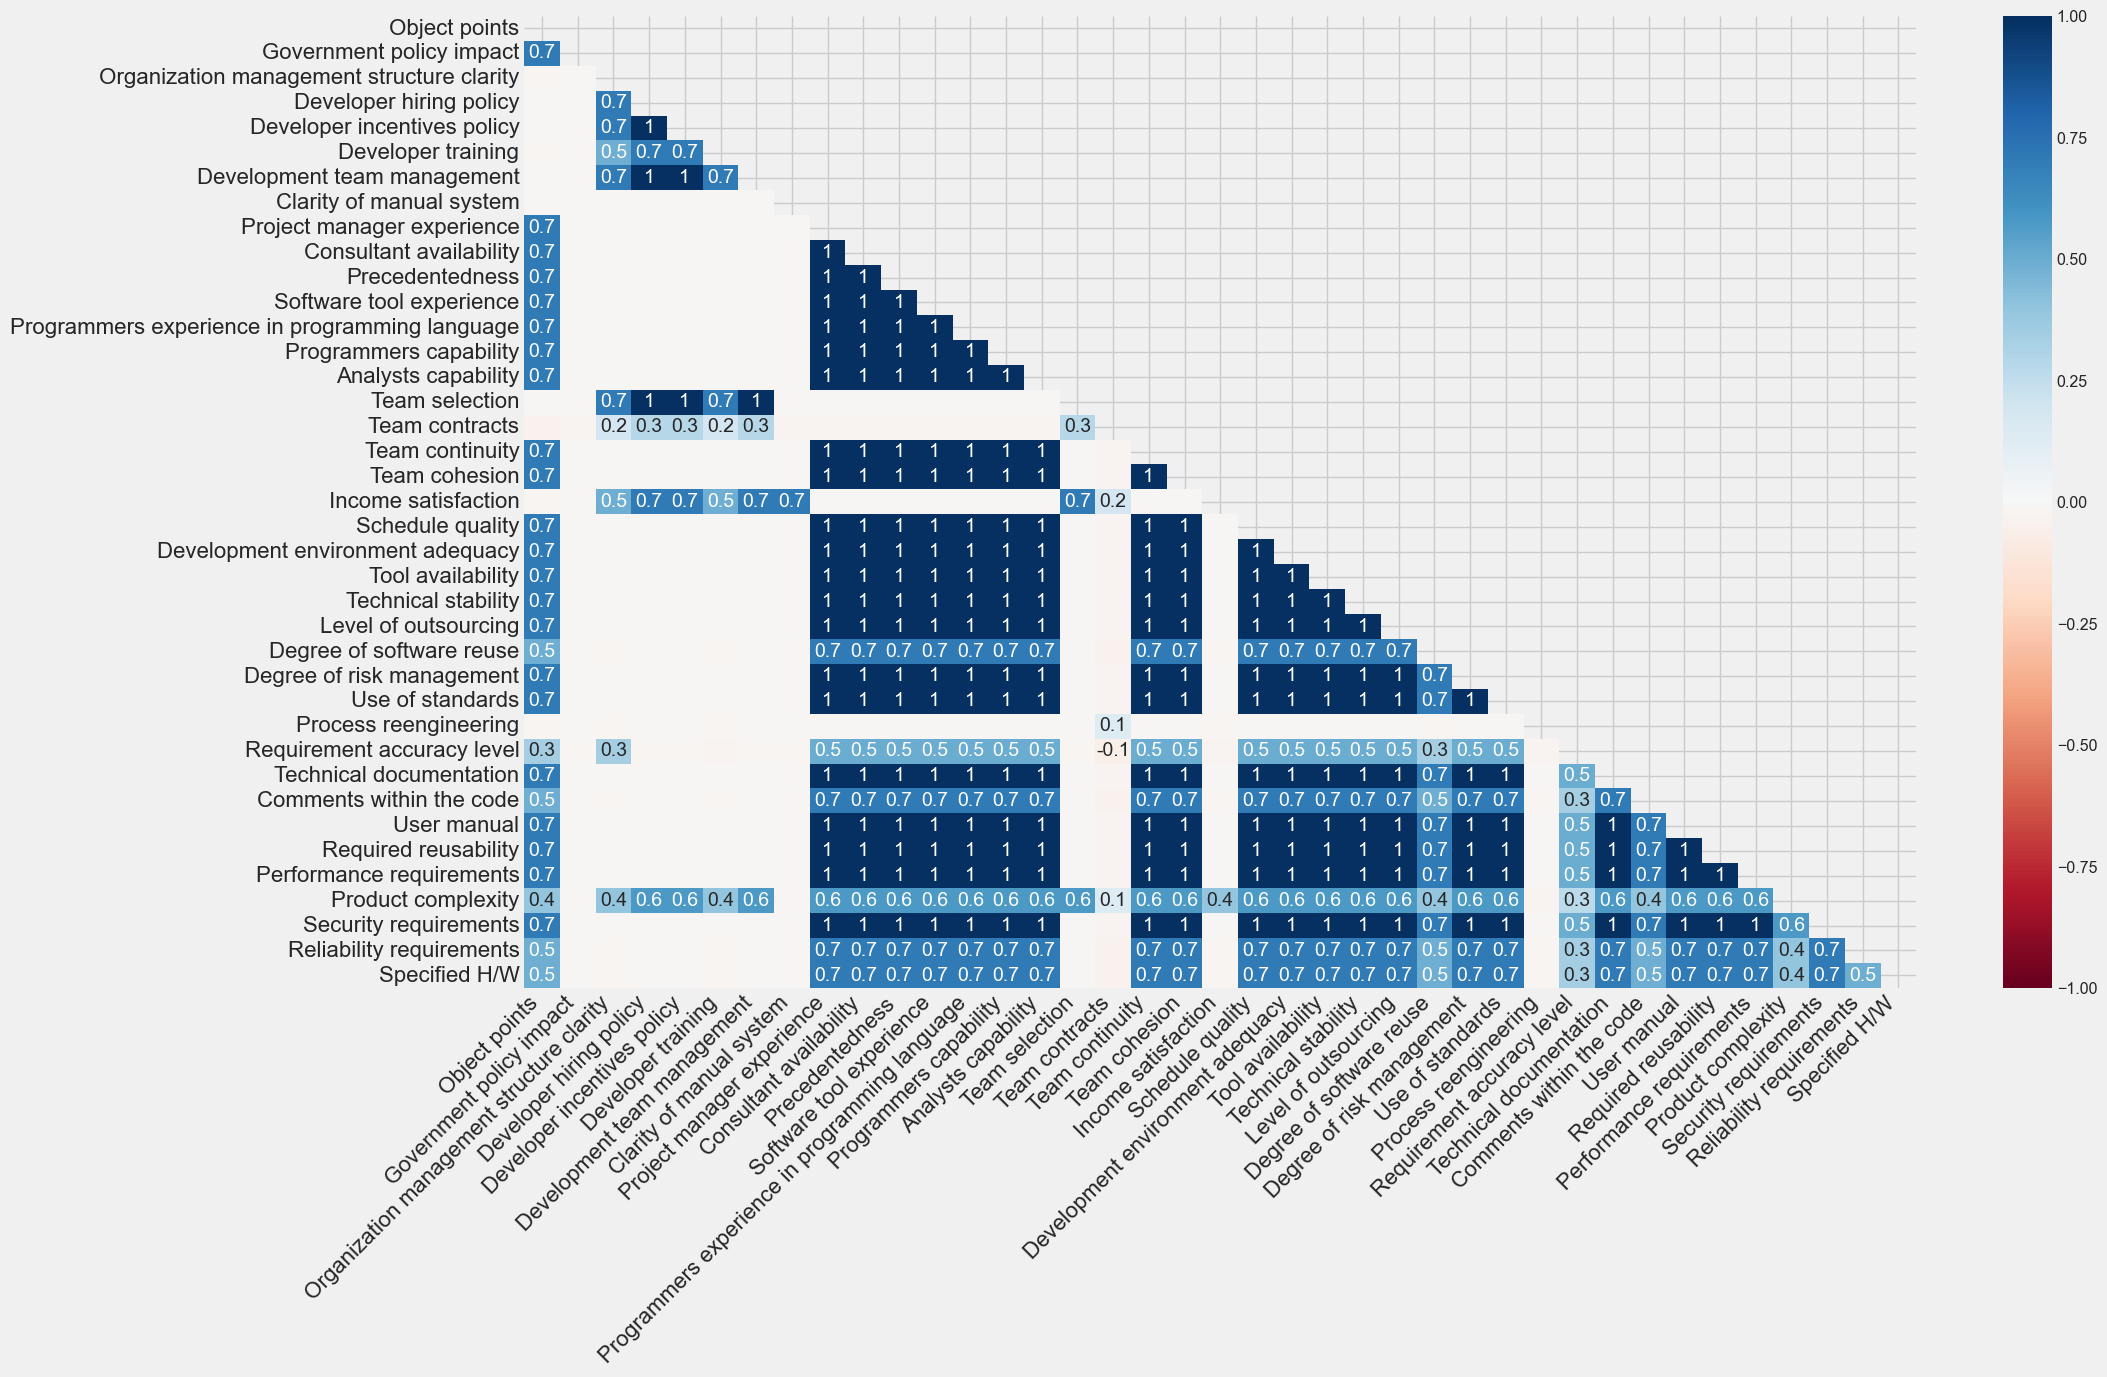

In [ ]:
import missingno as msno

# Visualize missing values as a matrix
# msno.matrix(df_sierra)
# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.
msno.heatmap(df_sierra)

In [ ]:
df_sierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 71 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      120 non-null    int64  
 1   Year of project                                 120 non-null    int64  
 2   Organization type                               120 non-null    int64  
 3   Role in organization                            120 non-null    int64  
 4   Size of organization                            120 non-null    int64  
 5   Size of IT department                           120 non-null    int64  
 6   Customer organization type                      120 non-null    int64  
 7   Estimated duration                              120 non-null    float64
 8   Actual duration                                 120 non-null    float64
 9   Development type                           

In [ ]:
df_sierra.describe()

Unnamed: 0  Year of project  Organization type  Role in organization  \
count  120.000000       120.000000         120.000000             120.00000   
mean    59.500000      2011.958333           4.550000               1.97500   
std     34.785054         6.267692           1.358756               1.05689   
min      0.000000      1993.000000           1.000000               1.00000   
25%     29.750000      2008.750000           4.000000               1.00000   
50%     59.500000      2014.000000           5.000000               2.00000   
75%     89.250000      2017.000000           5.000000               2.00000   
max    119.000000      2019.000000           8.000000               8.00000   

       Size of organization  Size of IT department  \
count            120.000000             120.000000   
mean               7.841667               4.366667   
std                6.201106               4.134165   
min                1.000000               1.000000   
25%                3.000000               1.000000   
50%                4.500000               2.000000   
75%               16.000000               8.000000   
max               17.000000              12.000000   

       Customer organization type  Estimated duration  Actual duration  \
count                  120.000000          120.000000       120.000000   
mean                     7.941667            5.670833        10.375000   
std                      4.784948            3.685793         8.903604   
min                      1.000000            0.250000         0.500000   
25%                      3.000000            3.000000         5.000000   
50%                     10.000000            5.000000         8.000000   
75%                     13.000000            7.000000        12.000000   
max                     17.000000           20.000000        48.000000   

       Development type  Application domain  Object points  \
count        120.000000           120.00000     118.000000   
mean           1.516667             4.30000     203.474576   
std            0.987173             2.35004     250.811357   
min            1.000000             1.00000       7.000000   
25%            1.000000             2.00000      37.000000   
50%            1.000000             5.00000      93.000000   
75%            1.250000             7.00000     334.500000   
max            4.000000             7.00000    1700.000000   

       Other sizing method  Estimated effort  Actual effort  \
count           120.000000        120.000000     120.000000   
mean              2.241667       5225.183333    9060.929167   
std               0.819877       6881.106926   12598.482007   
min               1.000000        176.000000     396.000000   
25%               2.000000       1278.750000    2112.000000   
50%               2.000000       2860.000000    4576.000000   
75%               2.000000       6336.000000   10032.000000   
max               5.000000      50688.000000   79200.000000   

       Contract maturity  Government policy impact  \
count         120.000000                119.000000   
mean            4.341667                  3.495798   
std             1.621784                  1.111374   
min             1.000000                  1.000000   
25%             3.000000                  3.000000   
50%             4.000000                  4.000000   
75%             5.000000                  4.000000   
max             8.000000                  5.000000   

       Economic instability impact  Organization management structure clarity  \
count                   120.000000                                 118.000000   
mean                      1.958333                                   1.415254   
std                       1.252868                                   0.695852   
min                       1.000000                                   1.000000   
25%                       1.000000                                   1.000000   
50%                       1.000000       

In [ ]:
# df_sierra.dropna(axis=0)
# df_sierra
df_sierra.isnull().sum().sum()

64

In [ ]:
df_sierra.corr()

Unnamed: 0  Year of project  Organization type  \
Unnamed: 0                  1.000000        -0.144365           0.090675   
Year of project            -0.144365         1.000000          -0.073266   
Organization type           0.090675        -0.073266           1.000000   
Role in organization       -0.038744         0.136847          -0.031307   
Size of organization        0.266762         0.059070          -0.263846   
...                              ...              ...                ...   
Performance requirements   -0.208303         0.255143          -0.134994   
Product complexity         -0.083776         0.273523          -0.014360   
Security requirements      -0.363874         0.199261          -0.038107   
Reliability requirements   -0.192271         0.074983           0.000093   
Specified H/W              -0.122854         0.036789          -0.034408   

                          Role in organization  Size of organization  \
Unnamed: 0                           -0.038744              0.266762   
Year of project                       0.136847              0.059070   
Organization type                    -0.031307             -0.263846   
Role in organization                  1.000000             -0.126264   
Size of organization                 -0.126264              1.000000   
...                                        ...                   ...   
Performance requirements              0.085385              0.040766   
Product complexity                    0.056257             -0.006101   
Security requirements                 0.072278              0.135818   
Reliability requirements             -0.140968             -0.013066   
Specified H/W                        -0.045524              0.237429   

                          Size of IT department  Customer organization type  \
Unnamed: 0                             0.158008                    0.120589   
Year of project                        0.014540                    0.365019   
Organization type                      0.098435                   -0.090670   
Role in organization                  -0.067121                   -0.272805   
Size of organization                   0.786686                    0.315464   
...                                         ...                         ...   
Performance requirements              -0.002245                    0.043311   
Product complexity                    -0.038341                    0.086303   
Security requirements                  0.216072                   -0.068349   
Reliability requirements              -0.015144                   -0.018653   
Specified H/W                          0.332079                   -0.039376   

                          Estimated duration  Actual duration  \
Unnamed: 0                          0.109589         0.019861   
Year of project                    -0.169019        -0.175449   
Organization type                   0.197537        -0.012329   
Role in organization                0.084158         0.090306   
Size of organization               -0.083921         0.057323   
...                                      ...              ...   
Performance requirements           -0.046998        -0.052962   
Product complexity                 -0.004039        -0.021263   
Security requirements              -0.314736        -0.200861   
Reliability requirements            0.055155        -0.075542   
Specified H/W                      -0.026028         0.155592   

                          Development type  Application domain  Object points  \
Unnamed: 0                       -0.083939            0.053352       0.108164   
Year of project                   0.162414            0.182851      -0.145054   
Organization type                -0.057011           -0.204746       0.173667   
Role in organization              0.157462           -0.193190       0.327814   
Size of organization              0.259198            0.252974      -0.105731   
...                             

In [ ]:
# # import datadictionary as dd
# import visualization as dv
# # numerical_columns = list(set(df_sierra.columns) - set(dd.categorical_cols_names()))
# arrHeading.sort()
# len(arrHeading)

# dv.corr_matrix(df_sierra[arrHeading])
# import data_manipulation as dm
# import data_visualization as dv
import data_dictionary as dd
# import data_preprocessing as dp
numerical_columns = list(set(df_sierra.columns) - set(dd.categorical_cols_names()))
numerical_columns.sort()
print("Numerical Column : ", len(numerical_columns))

Numerical Column :  36


In [ ]:


df_sierra[numerical_columns].describe()

Actual duration  Actual effort  Analysts capability  \
count       120.000000     120.000000           119.000000   
mean         10.375000    9060.929167             1.731092   
std           8.903604   12598.482007             0.945081   
min           0.500000     396.000000             1.000000   
25%           5.000000    2112.000000             1.000000   
50%           8.000000    4576.000000             1.000000   
75%          12.000000   10032.000000             2.000000   
max          48.000000   79200.000000             4.000000   

       Clarity of manual system  Contract maturity  Daily working hours  \
count                119.000000         120.000000           120.000000   
mean                   4.277311           4.341667             8.258333   
std                    1.395661           1.621784             1.600923   
min                    2.000000           1.000000             4.000000   
25%                    3.000000           3.000000             8.000000   
50%                    4.000000           4.000000             8.000000   
75%                    6.000000           5.000000             8.000000   
max                    8.000000           8.000000            14.000000   

       Dedicated team members  Degree of risk management  \
count              120.000000                 119.000000   
mean                 4.266667                   2.436975   
std                  6.446592                   0.829934   
min                  0.000000                   1.000000   
25%                  1.000000                   2.000000   
50%                  3.000000                   3.000000   
75%                  5.000000                   3.000000   
max                 48.000000                   3.000000   

       Developer incentives policy  Development environment adequacy  \
count                   119.000000                        119.000000   
mean                      5.655462                          1.226891   
std                       1.617892                          0.573969   
min                       2.000000                          1.000000   
25%                       4.000000                          1.000000   
50%                       6.000000                          1.000000   
75%                       7.000000                          1.000000   
max                       8.000000                          4.000000   

       Development team management  Economic instability impact  \
count                   119.000000                   120.000000   
mean                      4.109244                     1.958333   
std                       2.090292                     1.252868   
min                       2.000000                     1.000000   
25%                       2.500000                     1.000000   
50%                       3.000000                     1.000000   
75%                       5.000000                     3.000000   
max                      11.000000                     7.000000   

       Estimated duration  Estimated effort  Multiple programing languages  \
count          120.000000        120.000000                     120.000000   
mean             5.670833       5225.183333                       1.191667   
std              3.685793       6881.106926                       0.472715   
min              0.250000        176.000000                       1.000000   
25%              3.000000       1278.750000                       1.000000   
50%              5.000000       2860.000000                       1.000000   
75%              7.000000       6336.000000                       1.000000   
max             20.000000      50688.000000                       3.000000   

       Object points  Other sizing method  Performance requirements  \
count     118.000000           120.000000                119.000000   
mean      203.474576             2.241667                  1.638655   
std       250.811357             0.819877                  0.9

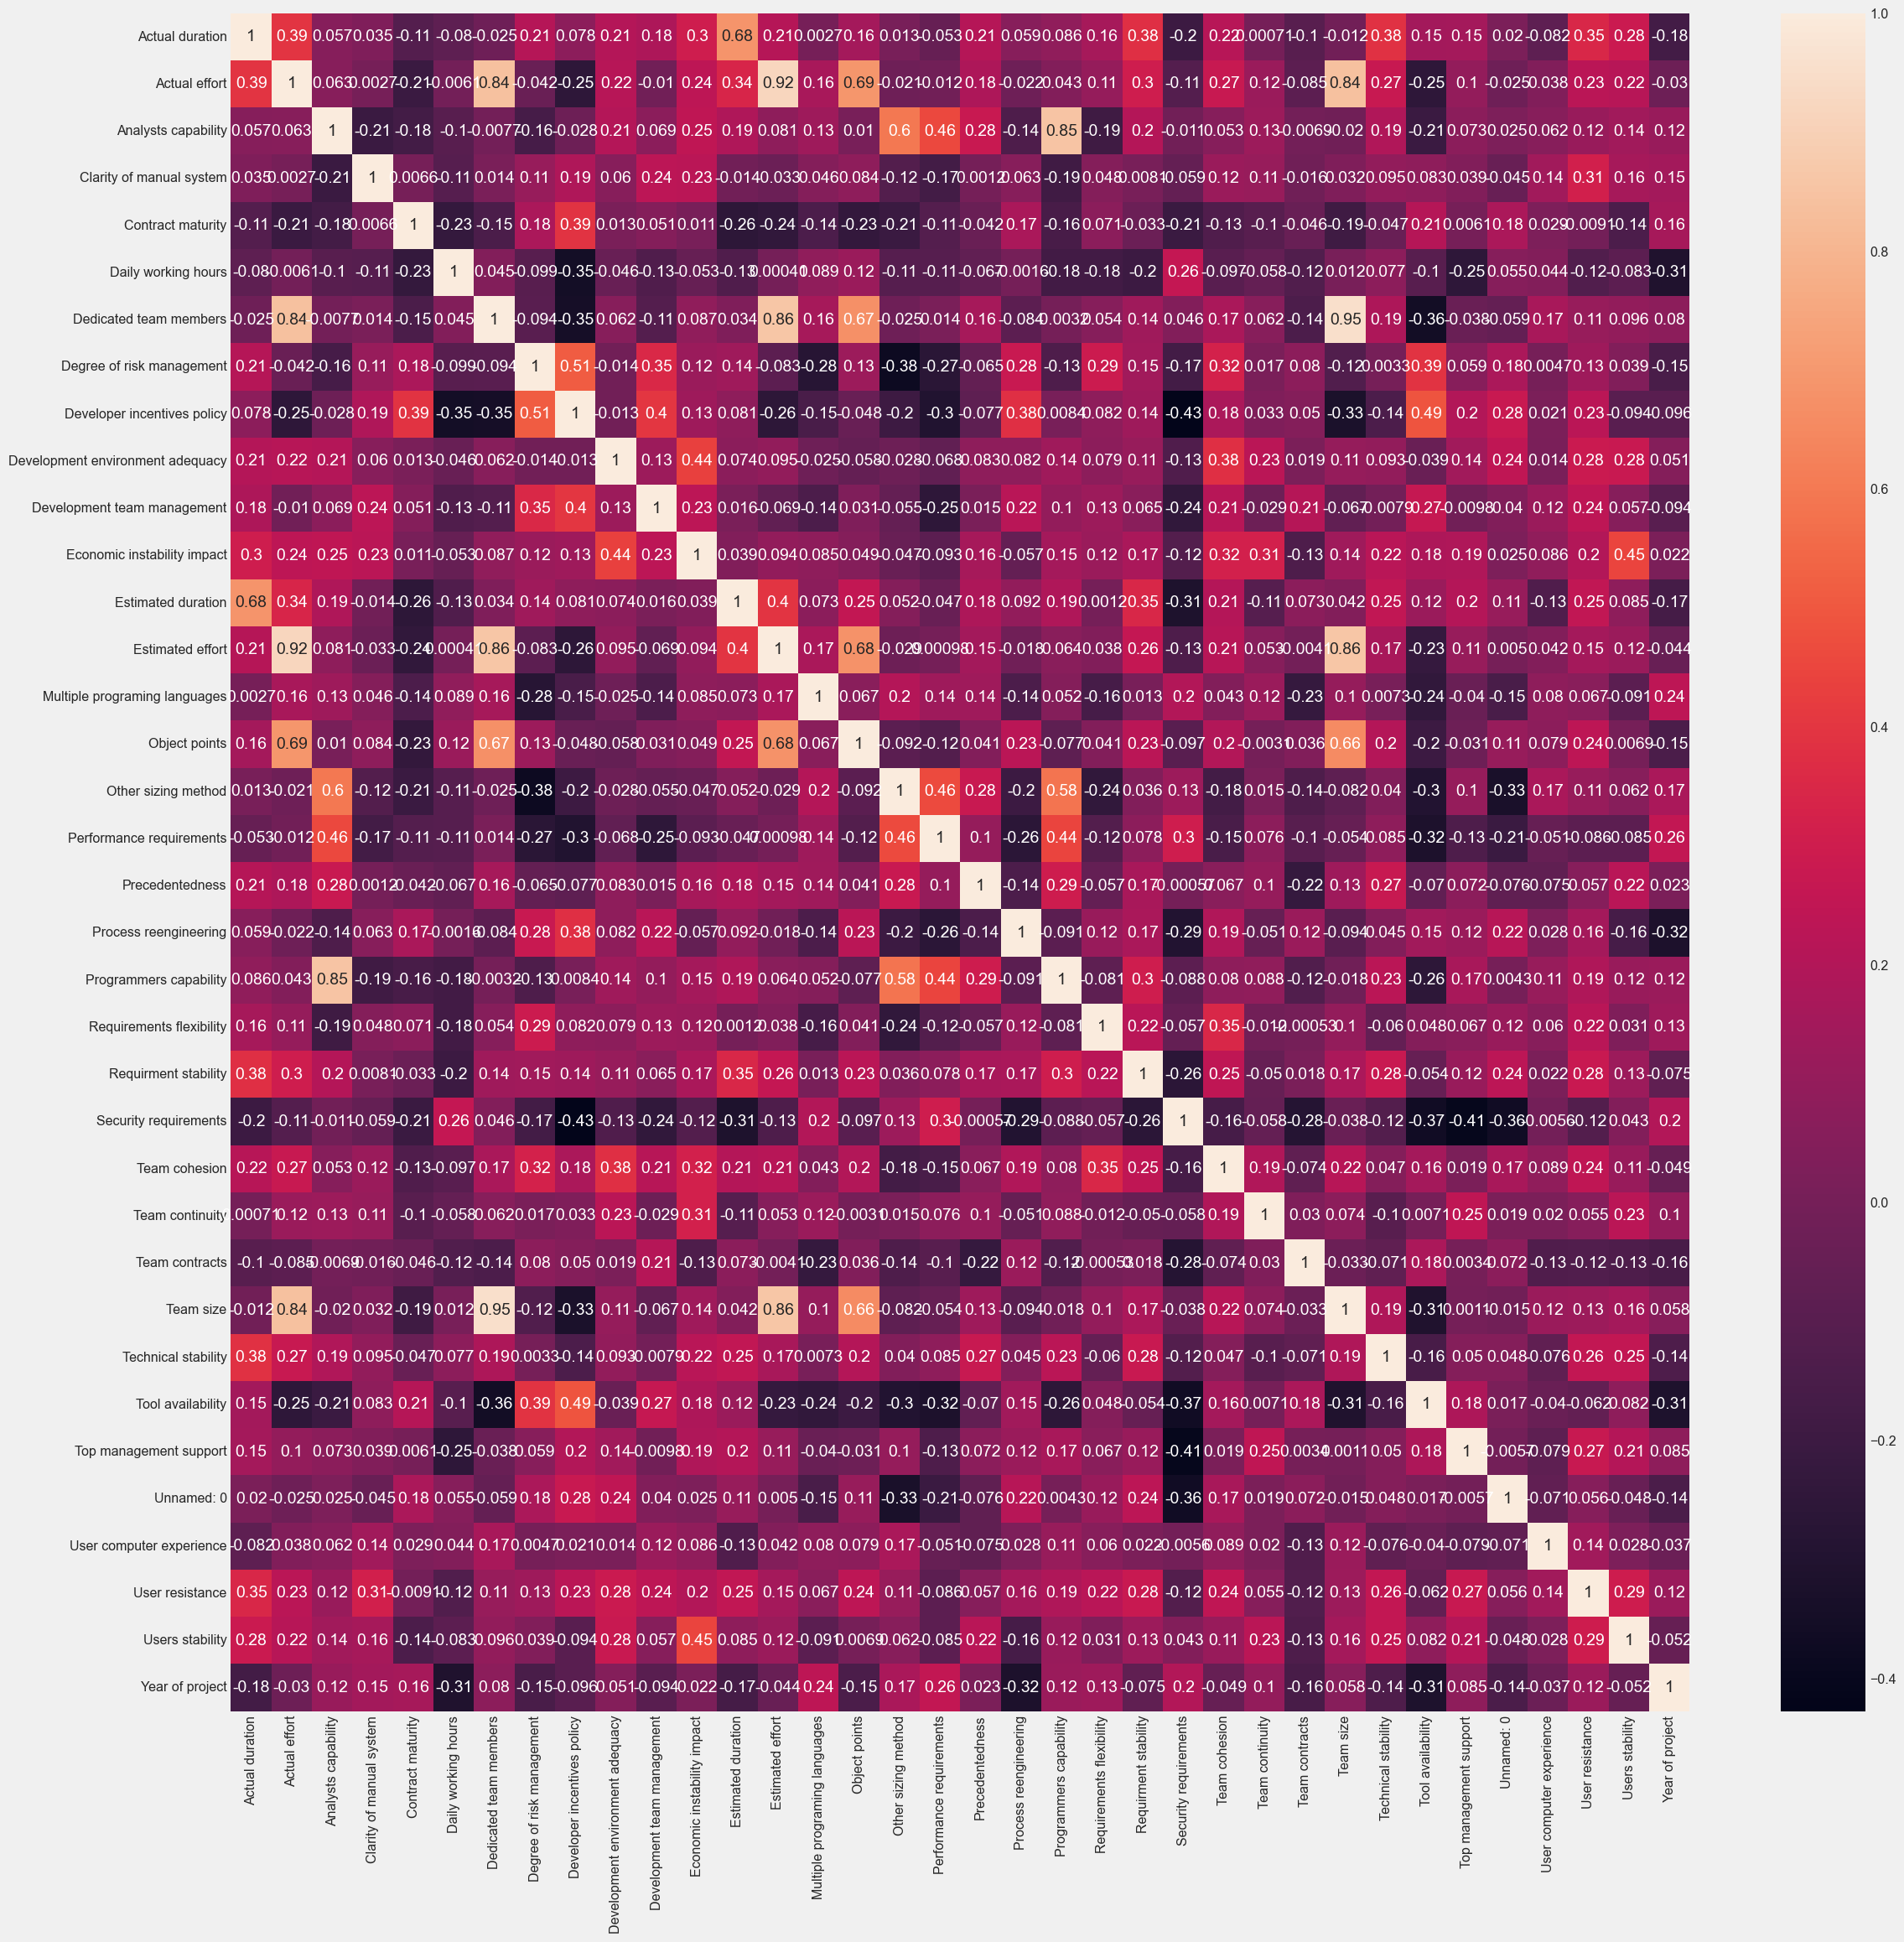

In [ ]:
import data_visualization as dv
dv.corr_matrix(df_sierra[numerical_columns])

### High correlations ###
1.  Actual duration: Estimated duration (0.68)
2.  Actual effort: Estimated effort (0.92), Dedicated team members (0.84), Object points (0.69), Team size (0.84)
3.  Analysts capability: Programmers capability (0.85)
4.  Dedicated team member: Team size (0.95), Estimated effort (0.86)
5.  Estimated effort: Object points (0.68), Team size (0.86)

<Axes: title={'center': 'Pearson Correlation of Features'}>

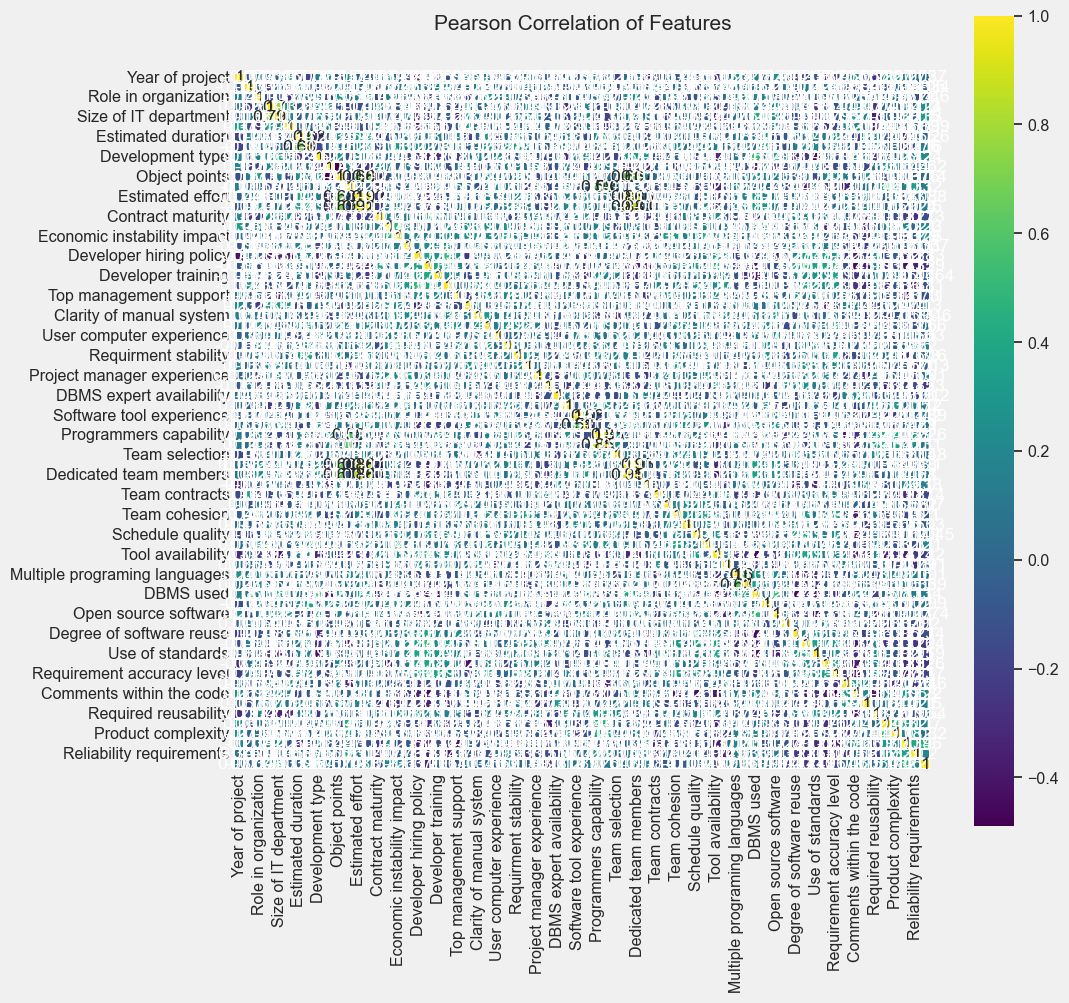

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_sierra.drop(['Unnamed: 0'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

In [ ]:
features = arrHeading
print(features)
# features
max_corr_features = ['Actual duration', 'Actual effort', 'Analysts capability','Dedicated team members','Estimated effort']
# max_corr_features = ['Object points', 'Estimated duration', 'Team size','Development environment adequacy','Developer incentives policy','Requirement accuracy level','Degree of risk management','Estimated effort']
# max_corr_features = ['Actual duration', 'Analysts capability', 'Application domain','Developer incentives policy','Programming language used','Size of organization','Degree of risk management','Estimated effort']
# max_corr_features = ['Actual duration', 'Analysts capability', 'Application domain','Developer incentives policy','Programming language used']
# 'Object points': Metrik yang mengukur ukuran dan kompleksitas perangkat lunak.
# 'Estimated duration': Durasi perkiraan proyek.
df_sierra = df_sierra.dropna(axis=0)

X = df_sierra[max_corr_features]
# X = df_sierra[features]
y = df_sierra['Estimated effort']

# X.describe()
X.isnull().sum().sum()



['Actual duration', 'Actual effort', 'Analysts capability', 'Application domain', 'Clarity of manual system', 'Comments within the code', 'Consultant availability', 'Contract maturity', 'Customer organization type', 'DBMS expert availability', 'DBMS used', 'Daily working hours', 'Dedicated team members', 'Degree of risk management', 'Degree of software reuse', 'Developer hiring policy', 'Developer incentives policy', 'Developer training', 'Development environment adequacy', 'Development team management', 'Development type', 'Economic instability impact', 'Estimated duration', 'Estimated effort', 'Government policy impact', 'Income satisfaction', 'Level of outsourcing', 'Methodology', 'Multiple programing languages', 'Object points', 'Open source software', 'Organization management structure clarity', 'Organization type', 'Other sizing method', 'Performance requirements', 'Precedentedness', 'Process reengineering', 'Product complexity', 'Programmers capability', 'Programmers experience 

0

c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Year of project'>

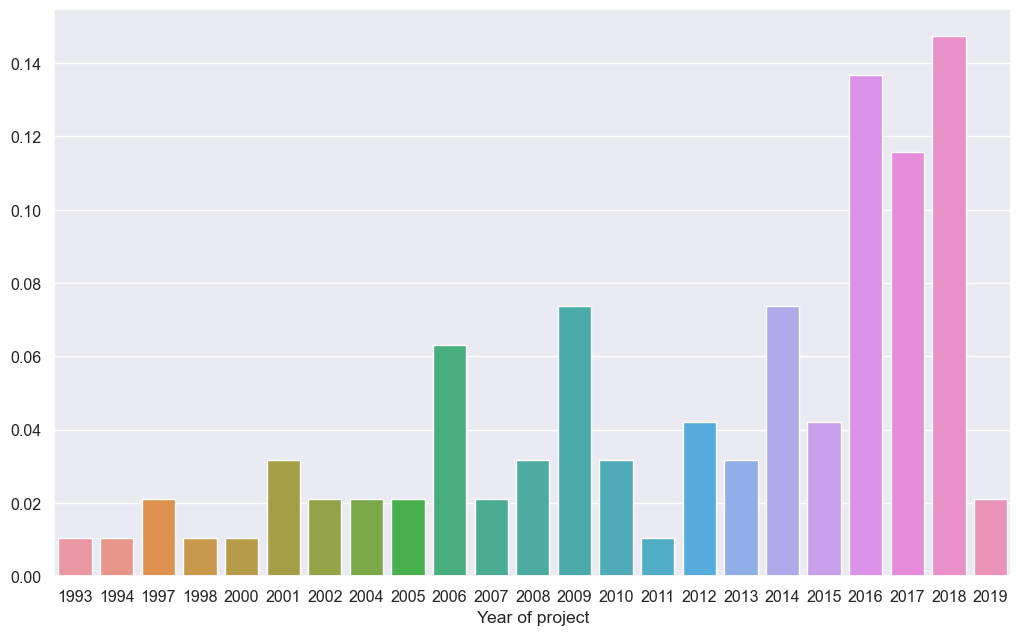

In [ ]:
plt.figure(figsize = (11, 7))
counts = df_sierra['Year of project'].value_counts(normalize = True, sort = False)
sns.barplot(x = counts.index, y = counts.values)

KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
# Akurasi
print(neigh.score(X_test, y_test))


# Menghitung prediksi
predict = neigh.predict(X_test)

# Menghitung R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
r_squared = r2_score(y_test, predict)

# Menghitung Mean Square Error (MSE)
mse = mean_squared_error(y_test, predict)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predict)

# Menghitung Mean Magnitude of Relative Error (MMRE)
mmre = np.mean((predict - y_test) / y_test)

# Menghitung Median Magnitude of Relative Error (MdMRE)
mdmre = np.median((predict - y_test) / y_test)

# Menghitung Mean Magnitude of Error Relative (MMER)
mmer = np.mean(np.abs(predict - y_test) / y_test)

# Menghitung Prediction Accuracy 25%
acc_25 = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Menghitung Prediction Accuracy 50%
acc_50 = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# Menampilkan hasil dalam bentuk persentase
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
print("Root Mean Square (RMSE):", np.sqrt(mse))
print("R-squared (R2):", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Mean Magnitude of Relative Error (MMRE):", mmre)
print("Median Magnitude of Relative Error (MdMRE):", mdmre)
print("Mean Magnitude of Error Relative (MMER):", mmer)


0.8570054387596127
Prediction Accuracy 25%: 81.25%
Prediction Accuracy 50%: 96.88%
Root Mean Square (RMSE): 1320.9918871712355
R-squared (R2): 0.8570054387596127
Mean Absolute Error (MAE): 731.6145833333333
Mean Magnitude of Relative Error (MMRE): 0.00851458212569323
Median Magnitude of Relative Error (MdMRE): -0.04652777777777776
Mean Magnitude of Error Relative (MMER): 0.15627473922468135


Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

predict = model.predict(X_test)
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, predict))

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25 = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50 = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square = model.score(X_test, y_test)

# Mean Magnitude of Relative Error
mean_magnitude_relative_error = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
median_magnitude_relative_error = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mean_magnitude_error_relative = (abs(predict - y_test)).mean()

# Mean Square Error
mean_square_error = mean_squared_error(y_test, predict)

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
print("R Square: {:.4f}".format(r_square))
print("Mean Magnitude of Relative Error: {:.4f}".format(mean_magnitude_relative_error))
print("Median Magnitude of Relative Error: {:.4f}".format(median_magnitude_relative_error))
print("Mean Magnitude of Error Relative: {:.4f}".format(mean_magnitude_error_relative))
print("Mean Square Error: {:.4f}".format(mean_square_error))


1.0
Root mean square:  1.5936762370930572e-12
Mean Absolute Error:  9.57456336436735e-13
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0000
Median Magnitude of Relative Error: 0.0000
Mean Magnitude of Error Relative: 0.0000
Mean Square Error: 0.0000


SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))

predict = LinearSVC.predict(X_test)
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, predict))

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25 = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50 = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square = r2_score(y_test, predict)

# Mean Magnitude of Relative Error
mean_magnitude_relative_error = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
median_magnitude_relative_error = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mean_magnitude_error_relative = (abs(predict - y_test)).mean()

# Mean Square Error
mean_square_error = mean_squared_error(y_test, predict)

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
print("R Square: {:.4f}".format(r_square))
print("Mean Magnitude of Relative Error: {:.4f}".format(mean_magnitude_relative_error))
print("Median Magnitude of Relative Error: {:.4f}".format(median_magnitude_relative_error))
print("Mean Magnitude of Error Relative: {:.4f}".format(mean_magnitude_error_relative))
print("Mean Square Error: {:.4f}".format(mean_square_error))


Best params hash: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.9999999999282362
Root mean square:  0.047222124167603456
Mean Absolute Error:  0.03685975862380175
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0000
Median Magnitude of Relative Error: 0.0000
Mean Magnitude of Error Relative: 0.0369
Mean Square Error: 0.0022


Bayesian Regression

In [ ]:
# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)
print("Bayesian Regression RMSE:", rmse_bayesian)
print("Bayesian Regression MAE:", mae_bayesian)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25 = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50 = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square = r2_score(y_test, y_pred_bayesian)

# Mean Magnitude of Relative Error
mean_magnitude_relative_error = (abs((y_pred_bayesian - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
median_magnitude_relative_error = np.median(abs((y_pred_bayesian - y_test) / y_test))

# Mean Magnitude of Error Relative
mean_magnitude_error_relative = (abs(y_pred_bayesian - y_test)).mean()

# Mean Square Error
mean_square_error = mean_squared_error(y_test, y_pred_bayesian)

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
print("R Square: {:.4f}".format(r_square))
print("Mean Magnitude of Relative Error: {:.4f}".format(mean_magnitude_relative_error))
print("Median Magnitude of Relative Error: {:.4f}".format(median_magnitude_relative_error))
print("Mean Magnitude of Error Relative: {:.4f}".format(mean_magnitude_error_relative))
print("Mean Square Error: {:.4f}".format(mean_square_error))

Bayesian Regression RMSE: 4.114071774500757e-09
Bayesian Regression MAE: 3.2759057688735993e-09
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0000
Median Magnitude of Relative Error: 0.0000
Mean Magnitude of Error Relative: 0.0000
Mean Square Error: 0.0000


Random Forest Dengan PCA

In [ ]:
# Import pustaka yang diperlukan
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression dengan PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf_model_pca = RandomForestRegressor()
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
rmse_rf_pca = np.sqrt(mean_squared_error(y_test, y_pred_rf_pca))
mae_rf_pca = mean_absolute_error(y_test, y_pred_rf_pca)
print("Random Forest Regression with PCA RMSE:", rmse_rf_pca)
print("Random Forest Regression with PCA MAE:", mae_rf_pca)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25 = sum(abs((y_pred_rf_pca - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50 = sum(abs((y_pred_rf_pca - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square = r2_score(y_test, y_pred_rf_pca)

# Mean Magnitude of Relative Error
mean_magnitude_relative_error = (abs((y_pred_rf_pca - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
median_magnitude_relative_error = np.median(abs((y_pred_rf_pca - y_test) / y_test))

# Mean Magnitude of Error Relative
mean_magnitude_error_relative = (abs(y_pred_rf_pca - y_test)).mean()

# Mean Square Error
mean_square_error = mean_squared_error(y_test, y_pred_rf_pca)

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
print("R Square: {:.4f}".format(r_square))
print("Mean Magnitude of Relative Error: {:.4f}".format(mean_magnitude_relative_error))
print("Median Magnitude of Relative Error: {:.4f}".format(median_magnitude_relative_error))
print("Mean Magnitude of Error Relative: {:.4f}".format(mean_magnitude_error_relative))
print("Mean Square Error: {:.4f}".format(mean_square_error))


Random Forest Regression with PCA RMSE: 2925.789307263939
Random Forest Regression with PCA MAE: 1192.1593749999997
Prediction Accuracy 25%: 81.25%
Prediction Accuracy 50%: 87.50%
R Square: 0.7245
Mean Magnitude of Relative Error: 0.3068
Median Magnitude of Relative Error: 0.1380
Mean Magnitude of Error Relative: 1192.1594
Mean Square Error: 8560243.0705


Random Forest Tanpa PCA

In [ ]:
# Random Forest Regression (tanpa PCA) untuk perbandingan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
print("Random Forest Regression Score (without PCA):", rf_model_pca.score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


for i in np.arange(100, 1100, 100):
    regressor = RandomForestRegressor(n_estimators=i, max_features=5)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predict))
    mae_rf = mean_absolute_error(y_test, predict)

    # 7 Jenis Error Tambahan
    # Prediction Accuracy 25%
    acc_25 = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

    # Prediction Accuracy 50%
    acc_50 = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

    # R Square
    r_square = r2_score(y_test, predict)

    # Mean Magnitude of Relative Error
    mean_magnitude_relative_error = (abs((predict - y_test) / y_test)).mean()

    # Median Magnitude of Relative Error
    median_magnitude_relative_error = np.median(abs((predict - y_test) / y_test))

    # Mean Magnitude of Error Relative
    mean_magnitude_error_relative = (abs(predict - y_test)).mean()

    # Mean Square Error
    mean_square_error = mean_squared_error(y_test, predict)

    print(f"Random Forest with {i} Estimators")
    print("Root Mean Square Error:", rmse_rf)
    print("Mean Absolute Error:", mae_rf)
    print("Prediction Accuracy 25%: {:.2f}%".format(acc_25))
    print("Prediction Accuracy 50%: {:.2f}%".format(acc_50))
    print("R Square: {:.4f}".format(r_square))
    print("Mean Magnitude of Relative Error: {:.4f}".format(mean_magnitude_relative_error))
    print("Median Magnitude of Relative Error: {:.4f}".format(median_magnitude_relative_error))
    print("Mean Magnitude of Error Relative: {:.4f}".format(mean_magnitude_error_relative))
    print("Mean Square Error: {:.4f}".format(mean_square_error))
    print("\n")


c:\Users\Muhammad Andy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Random Forest Regression Score (without PCA): 0.004981477036255955
Random Forest with 100 Estimators
Root Mean Square Error: 638.0023549794897
Mean Absolute Error: 295.4909375
Prediction Accuracy 25%: 96.88%
Prediction Accuracy 50%: 96.88%
R Square: 0.9808
Mean Magnitude of Relative Error: 0.0902
Median Magnitude of Relative Error: 0.0327
Mean Magnitude of Error Relative: 295.4909
Mean Square Error: 407047.0050


Random Forest with 200 Estimators
Root Mean Square Error: 686.6504204714314
Mean Absolute Error: 290.13359375000005
Prediction Accuracy 25%: 96.88%
Prediction Accuracy 50%: 96.88%
R Square: 0.9777
Mean Magnitude of Relative Error: 0.0804
Median Magnitude of Relative Error: 0.0346
Mean Magnitude of Error Relative: 290.1336
Mean Square Error: 471488.7999


Random Forest with 300 Estimators
Root Mean Square Error: 626.5284519424498
Mean Absolute Error: 267.58072916666663
Prediction Accuracy 25%: 96.88%
Prediction Accuracy 50%: 96.88%
R Square: 0.9815
Mean Magnitude of Relative Er

Visualisasikan

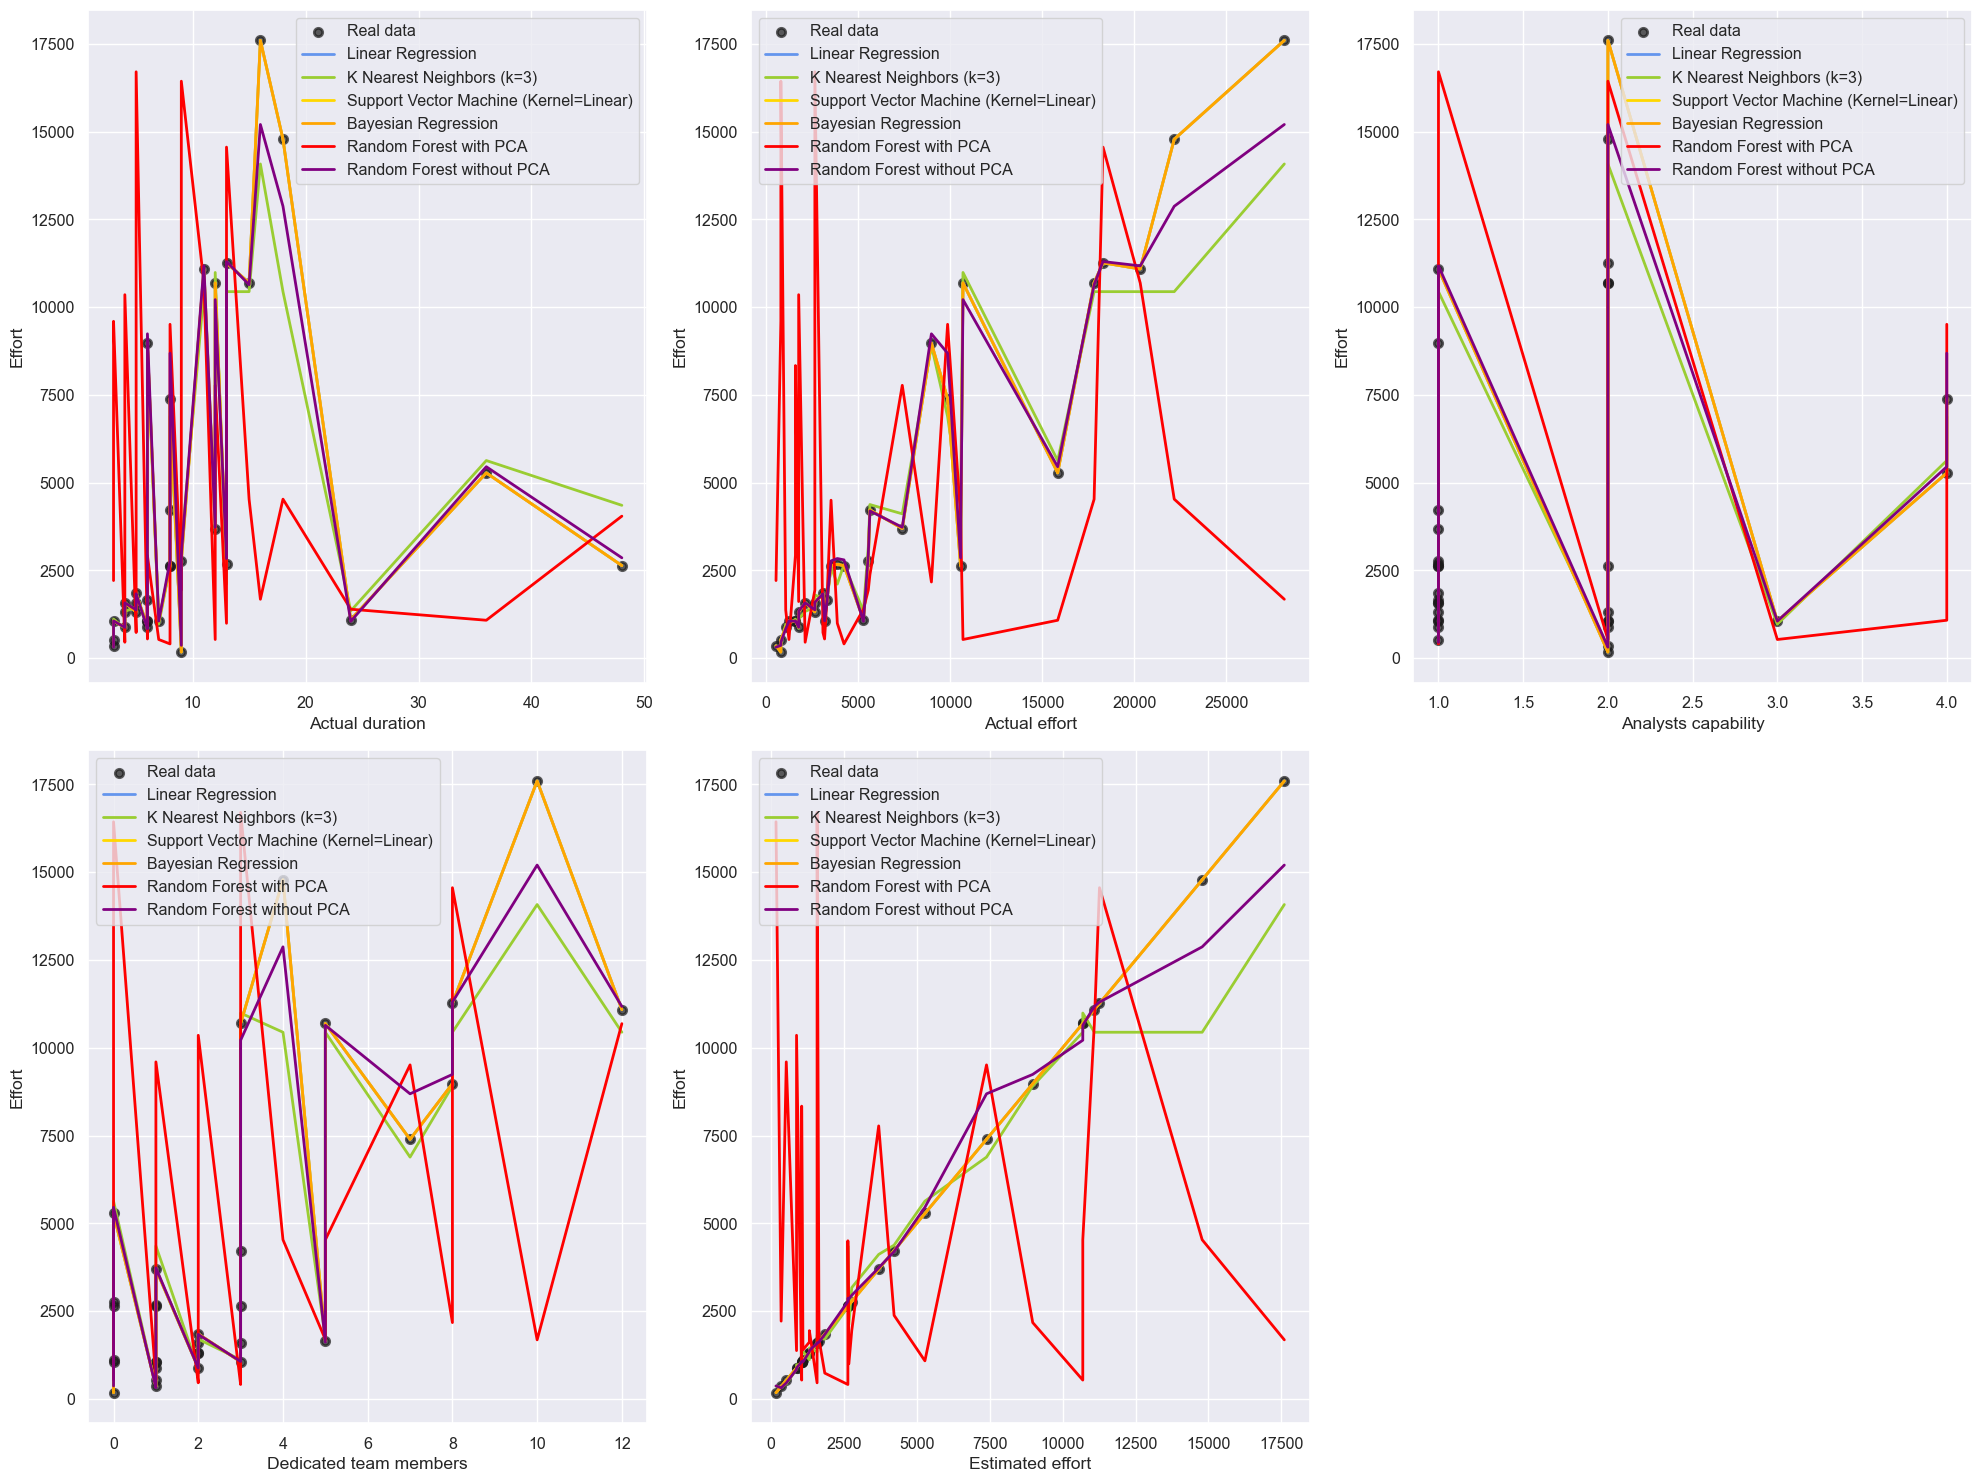

In [ ]:
import matplotlib.pyplot as plt

# Define the features you want to visualize
features_to_visualize = max_corr_features[:5]  # Assuming you want to visualize the top 6 features

plt.figure(figsize=(20, 15))  # Mengatur ukuran gambar lebih besar

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)

    # Real data
    plt.scatter(X_test[feature], y_test, label='Real data', lw=2, alpha=0.7, c='k')

    # Linear Regression Model
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    plt.plot(model_xs, model_ys, lw=2, label='Linear Regression', c='cornflowerblue')

    # K-nearest Neighbors
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    plt.plot(xs, ys, lw=2, label='K Nearest Neighbors (k=3)', c='yellowgreen')

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    plt.plot(svc_model_xs, svc_model_ys, lw=2, label='Support Vector Machine (Kernel=Linear)', c='gold')

    # Bayesian Regression
    bayesian_xs, bayesian_ys = zip(*sorted(zip(X_test[feature], bayesian_model.predict(X_test))))
    plt.plot(bayesian_xs, bayesian_ys, lw=2, label='Bayesian Regression', c='orange')

    # Random Forest Regression with PCA
    rf_xs_pca, rf_ys_pca = zip(*sorted(zip(X_test[feature], rf_model_pca.predict(X_test_pca))))
    plt.plot(rf_xs_pca, rf_ys_pca, lw=2, label='Random Forest with PCA', c='red')

    # Random Forest Regression without PCA
    rf_xs_no_pca, rf_ys_no_pca = zip(*sorted(zip(X_test[feature], regressor.predict(X_test))))
    plt.plot(rf_xs_no_pca, rf_ys_no_pca, lw=2, label='Random Forest without PCA', c='purple')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()

plt.tight_layout()
plt.show()


Perbandingan Root Mean Square Error (RMSE)

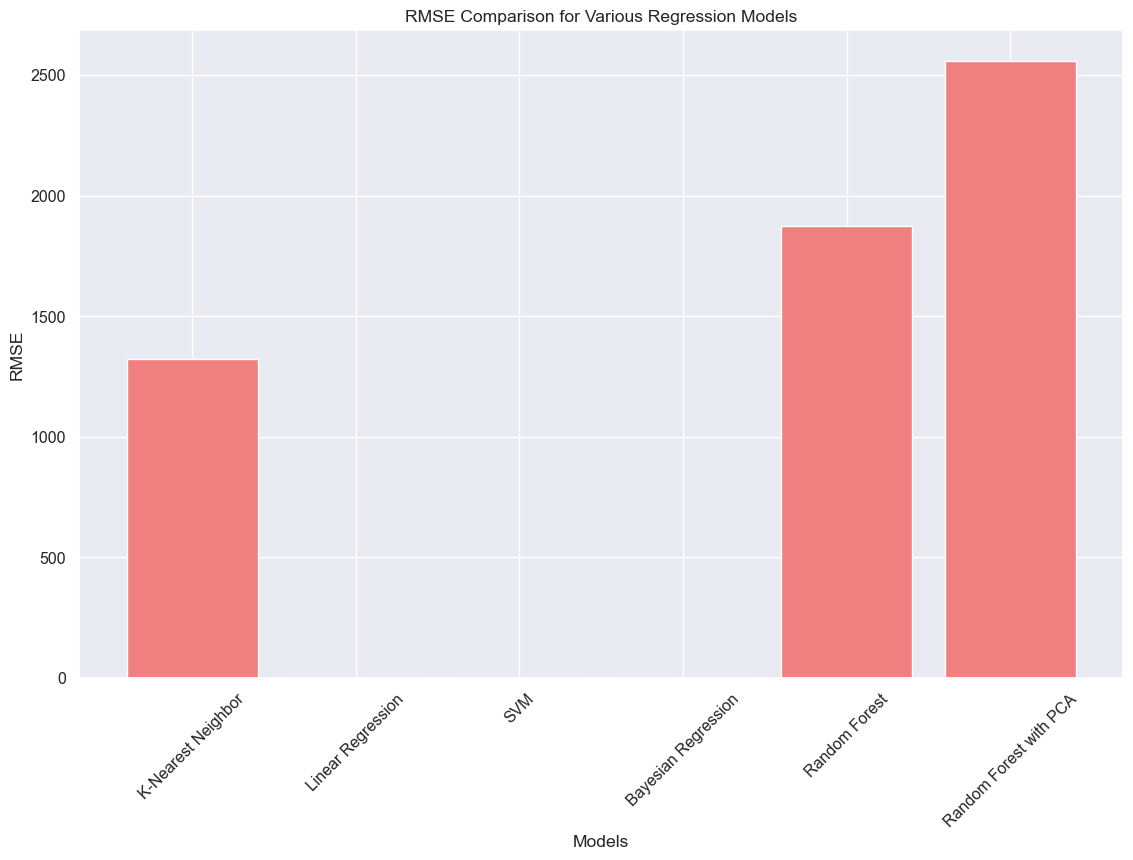

In [ ]:
import matplotlib.pyplot as plt

# Hitung RMSE untuk berbagai model
rmse_values = []

# K-Nearest Neighbor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, predict))
rmse_values.append(rmse_knn)

# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, predict))
rmse_values.append(rmse_linear)

# Support Vector Machine (SVM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}
svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)  # Perhatikan bahwa kita menggunakan y_train di sini
predict = LinearSVC.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_test, predict))
rmse_values.append(rmse_svm)


# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
y_pred_bayesian = bayesian_model.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
rmse_values.append(rmse_bayesian)

# Random Forest tanpa PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predict = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, predict))
rmse_values.append(rmse_rf)

# Random Forest dengan PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
rf_model_pca = RandomForestRegressor()
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
rmse_rf_pca = np.sqrt(mean_squared_error(y_test, y_pred_rf_pca))
rmse_values.append(rmse_rf_pca)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest', 'Random Forest with PCA']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color='lightcoral')
plt.title('RMSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


Gak Kepake ######

Bayesian Regression

In [ ]:
# Import pustaka yang diperlukan
from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
print("Bayesian Regression Score:", bayesian_model.score(X_test, y_test))

# Principal Component Analysis (PCA)
# Terapkan PCA untuk mereduksi dimensi fitur
pca = PCA(n_components=5)  # Anda dapat mengganti jumlah komponen sesuai kebutuhan
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest Regression dengan PCA
rf_model_pca = RandomForestRegressor()
rf_model_pca.fit(X_train_pca, y_train)
print("Random Forest Regression with PCA Score:", rf_model_pca.score(X_test_pca, y_test))

# Random Forest Regression (tanpa PCA) untuk perbandingan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print("Random Forest Regression Score (without PCA):", rf_model.score(X_test, y_test))


In [ ]:
for i, feature in enumerate(max_corr_features):
    print(feature)
    plt.figure(figsize=(18,6))

    # Bayesian Regression
    bayesian_ys = bayesian_model.predict(X_test)

    # Random Forest Regression dengan PCA
    rf_ys_pca = rf_model_pca.predict(X_test_pca)

    # Random Forest Regression tanpa PCA
    rf_ys_no_pca = rf_model.predict(X_test)

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(X_test[feature], bayesian_ys, lw=2, label='Bayesian Regression', c='orange')
    plt.plot(X_test[feature], rf_ys_pca, lw=2, label='Random Forest with PCA', c='red')
    plt.plot(X_test[feature], rf_ys_no_pca, lw=2, label='Random Forest without PCA', c='purple')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()
